In [ ]:
S# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets /fashion-mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets /fashion-mnist_test.csv")

In [ ]:
print("Train dataset shape:",train_df.shape)
train_df.head()

Train dataset shape: (60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("Test dataset shape:",test_df.shape)
test_df.head()

Test dataset shape: (10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(f"mising value form the train dataset: {train_df.isnull().sum().sum()}")

mising value form the train dataset: 0


In [ ]:
# labeled feature's count in the train data set
train_df["label"].value_counts()

,count
label,
2,6000
9,6000
6,6000
0,6000
3,6000
4,6000
5,6000
8,6000
7,6000


In [ ]:
# labeled feature's count in the test data set
test_df["label"].value_counts()

,count
label,
0,1000
1,1000
2,1000
3,1000
8,1000
6,1000
5,1000
4,1000
7,1000


##  Separate features and labels and Display dataset shape

In [ ]:
X_data= train_df.drop(["label"],axis=1)
Y_data= train_df["label"]

print(f" X data shape : {X_data.shape}")
print(f" Y data shape: {Y_data.shape}")

 X data shape : (60000, 784)
 Y data shape: (60000,)


In [ ]:
X_test= test_df.drop(["label"],axis=1)
Y_test= test_df["label"]

print(f" X data shape : {X_test.shape}")
print(f" Y data shape: {Y_test.shape}")

 X data shape : (10000, 784)
 Y data shape: (10000,)


In [ ]:
img_size=int(np.sqrt(X_data.shape[1]))
img_size

28

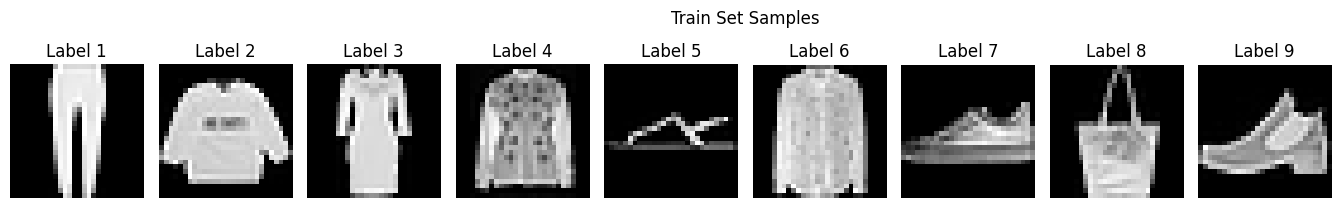

In [ ]:
plt.figure(figsize=(15, 4))
for label in range(1, 10):
    img=X_data[Y_data == label].iloc[0].values
    img=img.reshape((img_size, img_size))
    plt.subplot(2, 10, label)
    plt.imshow(img, cmap="gray")
    plt.title(f"Label {label}")
    plt.axis("off")
plt.suptitle("Train Set Samples")
plt.tight_layout()
plt.show()

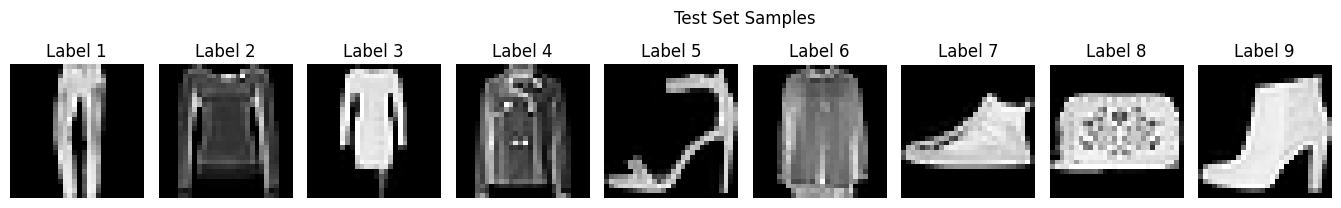

In [ ]:
plt.figure(figsize=(15,4))
for label in range(1,10):
    img_t= X_test[Y_test==label].iloc[0].values
    img_t= img_t.reshape((img_size,img_size))
    plt.subplot(2, 10, label)
    plt.imshow(img_t, cmap="gray")
    plt.title(f"Label {label}")
    plt.axis("off")
plt.suptitle("Test Set Samples")
plt.tight_layout()
plt.show()

In [ ]:
# Split into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)

X_train shape: (48000, 784)
Y_train shape: (48000,)
X_val shape: (12000, 784)
Y_val shape: (12000,)


In [ ]:
# Normalize image data
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0


In [ ]:
from tensorflow.keras.utils import to_categorical

if len(Y_train.shape) == 1:
    Y_train = to_categorical(Y_train, num_classes=10)
    Y_val = to_categorical(Y_val, num_classes=10)
    Y_test = to_categorical(Y_test, num_classes=10)

print("After encoding:")
print("Y_train shape:", Y_train.shape)  # Should be (n_samples, 10)
print("Y_val shape:", Y_val.shape)
print("Y_test shape:", Y_test.shape)

After encoding:
Y_train shape: (48000, 10)
Y_val shape: (12000, 10)
Y_test shape: (10000, 10)


In [ ]:
# Reshape input data for CNN
if len(X_train.shape) == 2:  # (samples, 784)
    X_train = X_train.values.reshape(-1, 28, 28, 1).astype("float32")
    X_val = X_val.values.reshape(-1, 28, 28, 1).astype("float32")
    X_test = X_test.values.reshape(-1, 28, 28, 1).astype("float32")


print("After reshaping:")
print("X_train shape:", X_train.shape)  # Should be (samples, 28, 28, 1)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

After reshaping:
X_train shape: (48000, 28, 28, 1)
X_val shape: (12000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

## Initial Model Training (Without Data Augmentation)

In [ ]:

model_CNN = Sequential()

# Block 1: Convolution + Pooling
model_CNN.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.25))

# Block 2: Convolution + Pooling
model_CNN.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.25))

# Fully Connected Layers
model_CNN.add(Flatten())
model_CNN.add(Dense(128, activation="relu"))
model_CNN.add(Dropout(0.25))
model_CNN.add(Dense(10, activation="softmax"))  # 10 output classes

# Compile
model_CNN.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train
history_CNN = model_CNN.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=30,
    batch_size=32
)


Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7395 - loss: 0.7116 - val_accuracy: 0.8805 - val_loss: 0.3307
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8685 - loss: 0.3626 - val_accuracy: 0.8967 - val_loss: 0.2823
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8881 - loss: 0.3081 - val_accuracy: 0.9034 - val_loss: 0.2643
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8967 - loss: 0.2797 - val_accuracy: 0.9106 - val_loss: 0.2462
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9050 - loss: 0.2547 - val_accuracy: 0.9143 - val_loss: 0.2343
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9082 - loss: 0.2463 - val_accuracy: 0.9139 - val_loss: 0.2313
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9142 - loss: 0.2313 - val_accuracy: 0.9185 - val_loss: 0.2299
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9187 - loss: 0.2155 

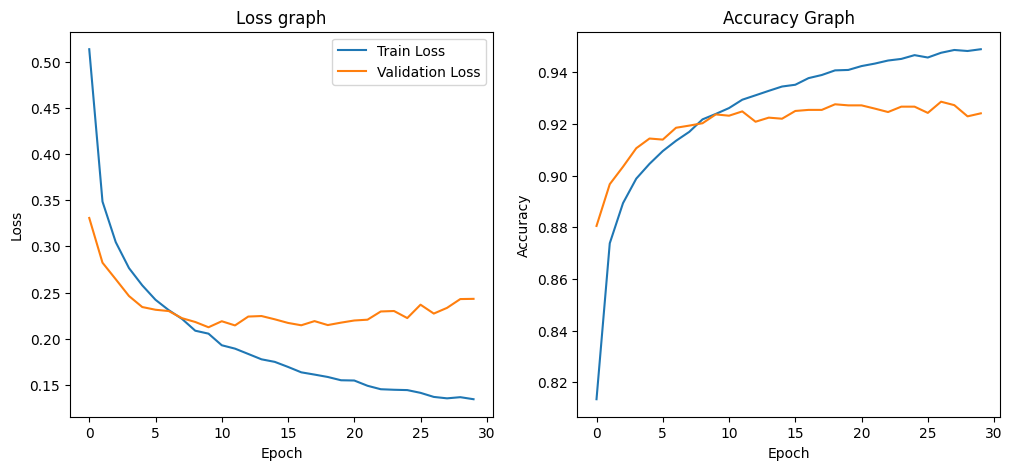

In [ ]:
plt.figure(figsize=(12,5))

#loss function
plt.subplot(1,2,1)
plt.plot(history_CNN.history["loss"],label="Train Loss")
plt.plot(history_CNN.history["val_loss"],label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss graph")
plt.legend()

#accuracy graph
plt.subplot(1,2,2)
plt.plot(history_CNN.history["accuracy"],label="Train Accuracy")
plt.plot(history_CNN.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph")

plt.show()

In [ ]:
# Evaluate model
test_loss, test_acc = model_CNN.evaluate(X_test, Y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9256 - loss: 0.2274

Test Accuracy: 0.9274


In [ ]:
# Predict and decode
Y_pred = model_CNN.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(Y_true, Y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.91      0.86      0.89      1000
           3       0.95      0.92      0.94      1000
           4       0.85      0.93      0.89      1000
           5       1.00      0.97      0.99      1000
           6       0.82      0.78      0.80      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.99      0.99      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



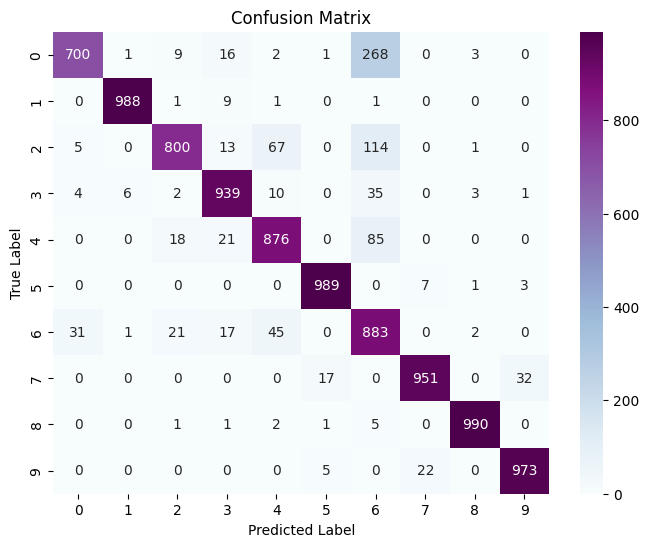

In [ ]:

# Confusion Matrix
conf_mat = confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Improved Model Training (With Data Augmentation)

> Add blockquote



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,          # Randomly rotate images by 0–10 degrees
    zoom_range=0.1,             # Random zoom
    width_shift_range=0.1,      # Shift image horizontally by 10%
    height_shift_range=0.1      # Shift image vertically by 10%
)
datagen.fit(X_train)

model_CNN = Sequential()
model_CNN.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Flatten())
model_CNN.add(Dense(128, activation="relu"))
model_CNN.add(Dropout(0.25))
model_CNN.add(Dense(10, activation="softmax"))
model_CNN.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history_CNN = model_CNN.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    validation_data=(X_val, Y_val),
    epochs=30
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.6546 - loss: 0.9211 - val_accuracy: 0.8104 - val_loss: 0.4681
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7820 - loss: 0.5678 - val_accuracy: 0.8524 - val_loss: 0.3890
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8103 - loss: 0.5024 - val_accuracy: 0.8635 - val_loss: 0.3619
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8273 - loss: 0.4689 - val_accuracy: 0.8802 - val_loss: 0.3217
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8336 - loss: 0.4429 - val_accuracy: 0.8834 - val_loss: 0.3047
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8437 - loss: 0.4190 - val_accuracy: 0.8885 - val_loss: 0.2924
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8497 - loss: 0.4016 - val_accuracy: 0.8892 - val_loss: 0.2832
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8549 - loss: 0.39

In [ ]:
test_loss, test_acc = model_CNN.evaluate(X_test, Y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9117 - loss: 0.2304

Test Accuracy: 0.9151


In [ ]:
Y_pred = model_CNN.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print("\nClassification Report:")
print(classification_report(Y_true, Y_pred_classes, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]))


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.89      0.81      0.85      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.93      0.81      0.87      1000
       Dress       0.93      0.92      0.93      1000
        Coat       0.83      0.91      0.87      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.71      0.79      0.75      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



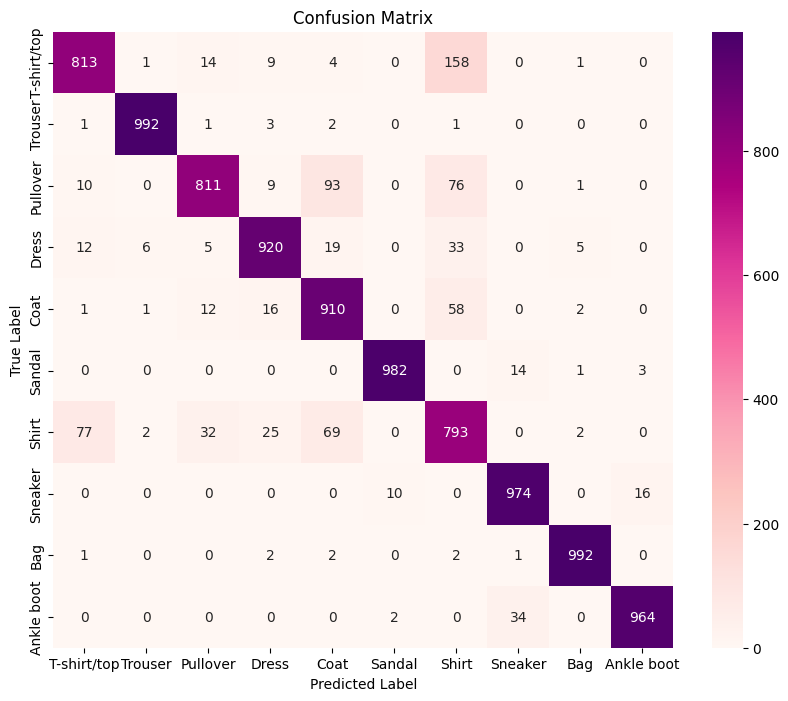

In [ ]:
conf_mat = confusion_matrix(Y_true, Y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='RdPu', xticklabels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
], yticklabels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Training Without Data Augmentation

Model: Simple CNN with two convolutional blocks

Training Data: Normalized Fashion-MNIST dataset (grayscale, 28x28)

Test Accuracy: 92.74%

The model performed well and achived ~93% accuracy and Struggled slightly with unseen variations.

## Training With Data Augmentation
Model: Same CNN modal

Data Augmentation Techniques that was used:

Rotation Range: 10 degrees

Zoom Range: 0.1

Width Shift Range: 0.1

Height Shift Range: 0.1

Test Accuracy: ~91%

## Conclusion:

Data augmentation improved generalization, model became more effective against slight rotations, shifts, and zooms. Data Augmentation also reduced overfitting significantly.
hence, the modal also performed good with data augmentation and achieved ~91% accuracy on test data.

In [ ]:
model_CNN.save('fashion_mnist_cnn_model.h5')

In [ ]:
from google.colab import files
files.download('fashion_mnist_cnn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>